## Lab Cleaning Numerical Data

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
customer_df = customer_df.rename(columns={"Customer": "customer", "State": "state", "Customer Lifetime Value": "customer_lifetime_value", 
                   "Response": "response",  "Coverage": "coverage", "Education": "education",
                   "Effective To Date": "effective_to_date", "EmploymentStatus": "employment_status", "Gender": "gender",
                  "Income": "income", "Location Code": "location_code", "Marital Status": "marital_status", 
                  "Monthly Premium Auto": "monthly_premium_auto", "Months Since Last Claim": "months_since_last_claim", 
                  "Months Since Policy Inception": "months_since_policy_inception", 
                  "Number of Open Complaints": "number_of_open_complaints", "Number of Policies": "number_of_policies", 
                   "Policy Type": "policy_type", "Policy": "policy", "Renew Offer Type": "renew_offer_type", 
                  "Sales Channel": "sales_channel", "Total Claim Amount": "total_claim_amount", 
                  "Vehicle Class": "vehicle_class", "Vehicle Size": "vehicle_size"})
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5. Change effective to date column to datetime format.

In [5]:
customer_df[["effective_to_date"]] = customer_df[["effective_to_date"]].apply(pd.to_datetime)
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [6]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [7]:
# Exploring unique values of several numerical columns

In [8]:
numerical_df["customer_lifetime_value"].unique()

array([ 2763.519279,  6979.535903, 12887.43165 , ...,  8163.890428,
        7524.442436,  2611.836866])

In [9]:
numerical_df["customer_lifetime_value"].nunique()

8041

In [10]:
numerical_df["total_claim_amount"].unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [11]:
numerical_df["total_claim_amount"].nunique()

5106

In [12]:
numerical_df["months_since_policy_inception"].unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [13]:
numerical_df["months_since_policy_inception"].nunique()

100

In [14]:
numerical_df["months_since_last_claim"].unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25], dtype=int64)

In [15]:
numerical_df["months_since_last_claim"].nunique()

36

In [16]:
numerical_df["number_of_open_complaints"].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [17]:
numerical_df["number_of_open_complaints"].nunique()

6

In [18]:
numerical_df["number_of_policies"].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [19]:
numerical_df["number_of_policies"].nunique()

9

In [20]:
numerical_df["income"].unique()

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

In [21]:
numerical_df["income"].nunique()

5694

In [22]:
numerical_df["monthly_premium_auto"].unique()

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [23]:
numerical_df["monthly_premium_auto"].nunique()

202

In [24]:
# Looking at the data types from the numericals:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [25]:
# Definition of discrete vs continuous variables: 
#Reference: https://articles.outlier.org/discrete-vs-continuous-variables
# discrete: A discrete variable is a variable that takes on distinct, countable values. e.G. Number of red M&M’s in a candy jar
#continuous: A continuous variable is a variable that can take on any value within a range, e.g. The time it takes sprinters to 
#run 100 meters

##### Decision after looking into the number of unique values for each column: All columns with a value > 10 for the nunique() function will be considered as continuous

In [26]:
#separating the discrete from the continuous variables in different dataframes:
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()

for column in numerical_df:
    if numerical_df[column].nunique() > 10:
        continuous_df[column] = numerical_df[column]
    else:
        discrete_df[column] = numerical_df[column]

    

In [27]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [28]:
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


### 8. Plot a correlation matrix, comment what you see.

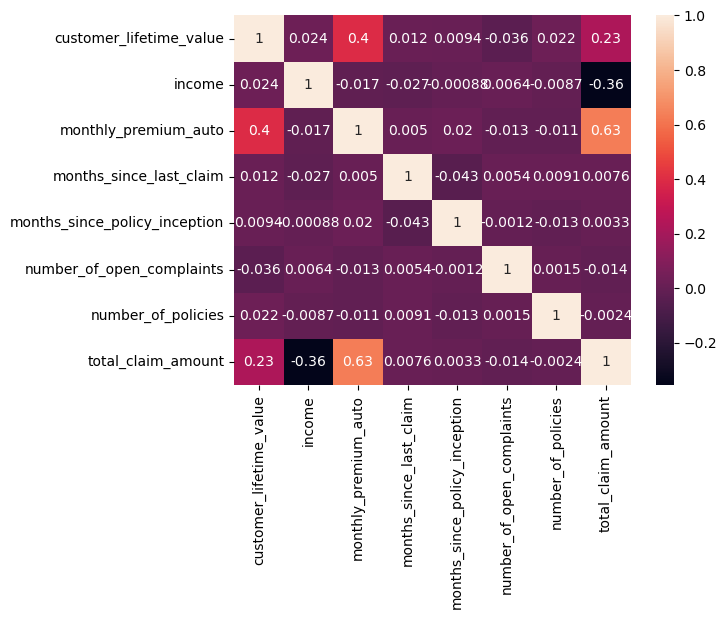

In [29]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

##### No high multicollinearity is seen, the highest correlation with 0.63 is between total_claim_amout and montly_premium_auto (both continuous variables). No correlation between numer_of_open_complaints and numer_of_policies (both discrete variables).


### 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [30]:
def plotDiscrete(dataFrame):
    for column in dataFrame:
        fig, ax = plt.subplots()
        ax.set_xlabel(column)
        dataFrame[column].hist(bins=10)
        plt.show()

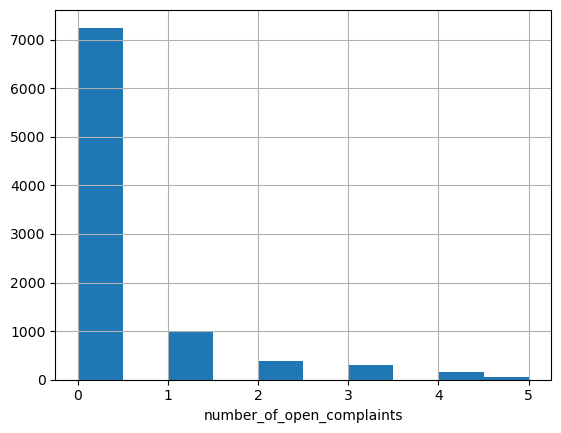

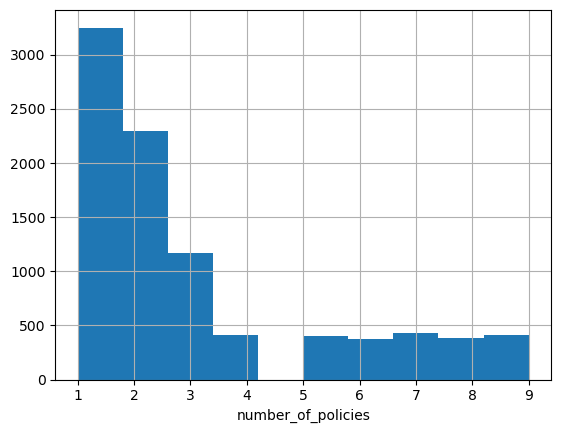

In [31]:
plotDiscrete(discrete_df)

In [32]:
def plotContinuous(dataFrame):
    for column in dataFrame:
        fig, ax = plt.subplots()
        ax.set_xlabel(column)
        dataFrame[column].hist(bins=10)
        plt.show()

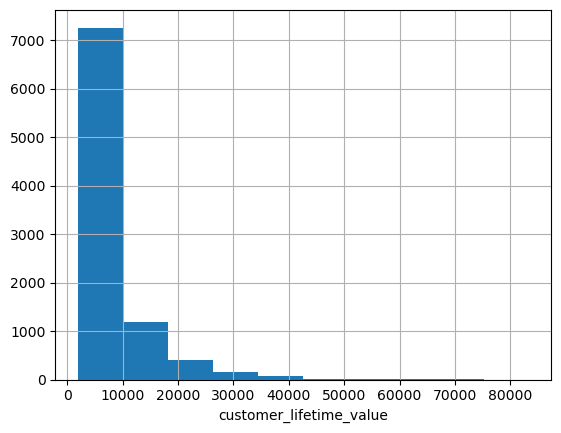

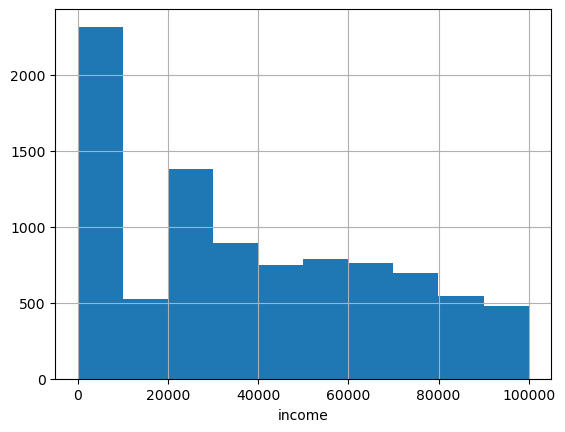

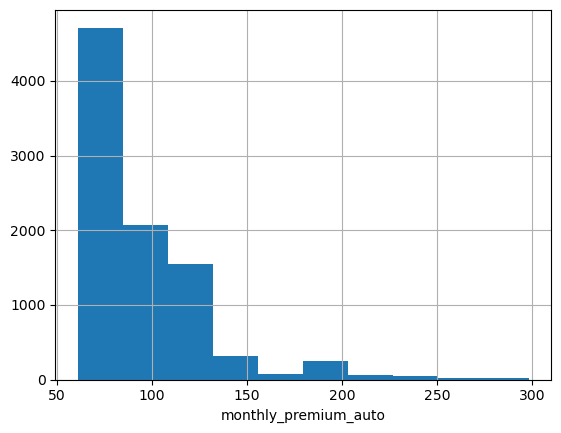

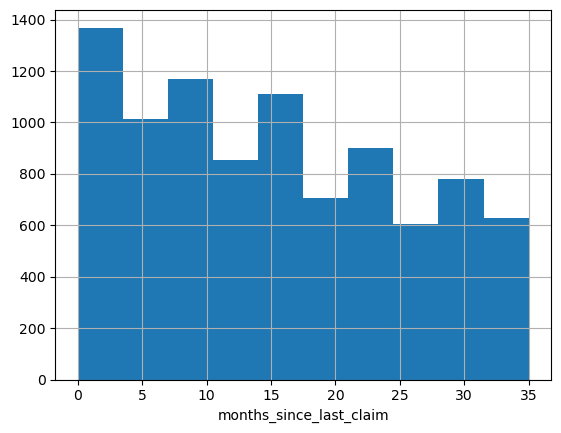

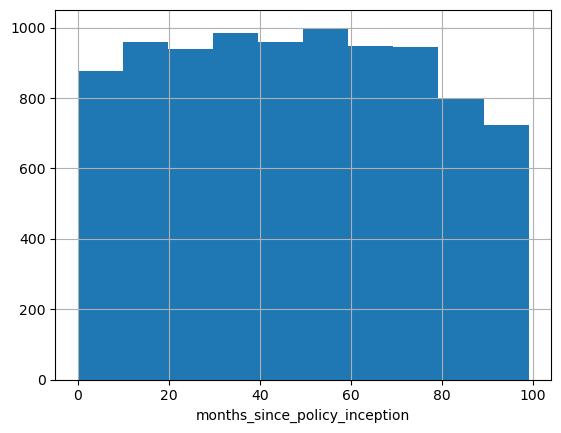

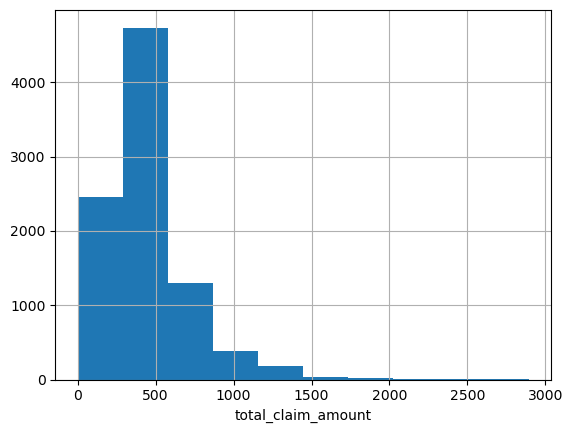

In [33]:
plotContinuous(continuous_df)

### 10. Comment what you can see in the plots.

##### For the discrete variables the range of variables on the x axis is smaller than for the continous variables, because all columns with a value > 10 for the nunique() function were sorted to the continuous dataframe. In the latter one, the ranges for each variable (or column) are much more diverse, they range from 0-35 until 0-100000

### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [34]:
def plotContinuousBox(dataFrame):
    for column in dataFrame:
        fig, ax = plt.subplots()
        sns.boxplot(y=dataFrame[column])
        plt.show()

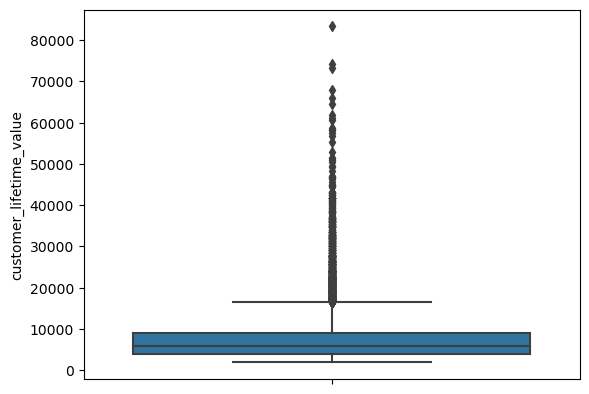

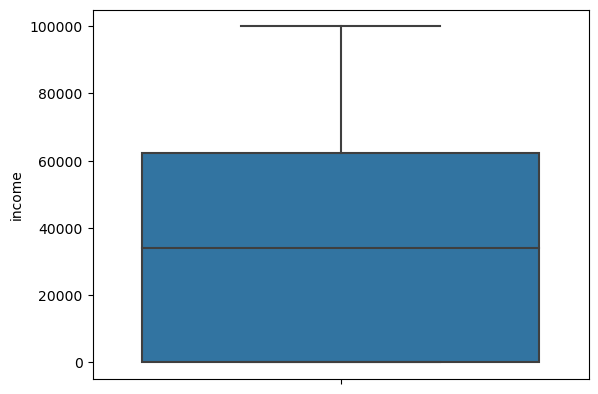

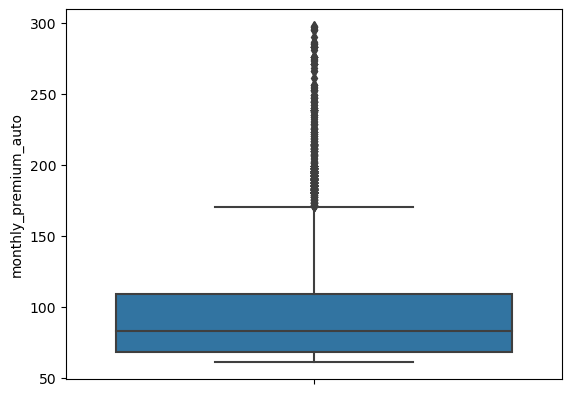

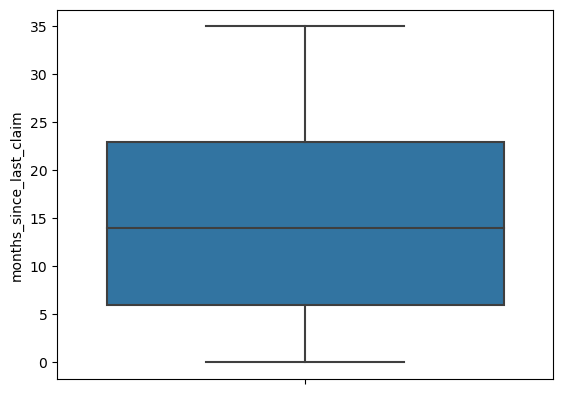

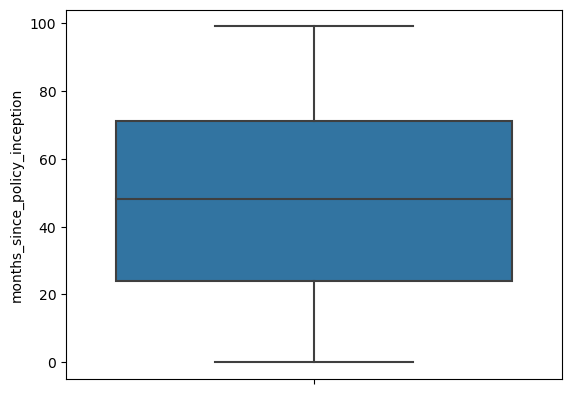

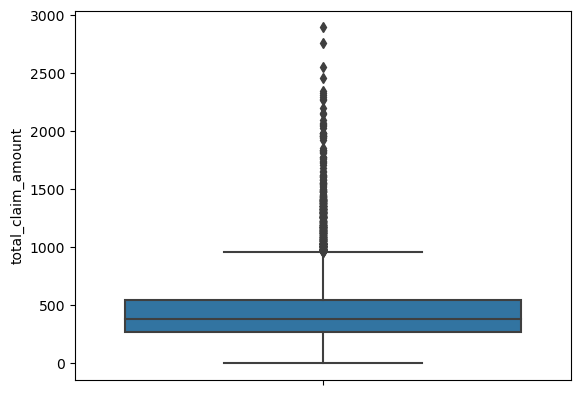

In [35]:
plotContinuousBox(continuous_df)

### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

##### For the customer_lifetime_value and total_claim_amount there are few data points at the top which could be handled as outliers, but since they are not that far away from the other data points I decided to keep them and don't remove them.

### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [36]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

##### No NaN values were found

### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [37]:
numerical_df.to_csv('numerical.csv', index=False)

## Lab Cleaning categorical data

### 1. Import the necessary libraries load the data and start a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [38]:
#Already done at beginning of notebook

### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [39]:
categorical_df = customer_df.select_dtypes(object)
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 3. Check for NaN values and decide what to do with them, do it now.

In [40]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

##### No NaN values could be found

### 4. Check all unique values of columns.

In [41]:
for column in categorical_df:
    print(column+" unique: ", categorical_df[column].unique())
    print(column+" nunique: ", categorical_df[column].nunique())

customer unique:  ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
customer nunique:  9134
state unique:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
state nunique:  5
response unique:  ['No' 'Yes']
response nunique:  2
coverage unique:  ['Basic' 'Extended' 'Premium']
coverage nunique:  3
education unique:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
education nunique:  5
employment_status unique:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
employment_status nunique:  5
gender unique:  ['F' 'M']
gender nunique:  2
location_code unique:  ['Suburban' 'Rural' 'Urban']
location_code nunique:  3
marital_status unique:  ['Married' 'Single' 'Divorced']
marital_status nunique:  3
policy_type unique:  ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy_type nunique:  3
policy unique:  ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
policy nun

### 5. Check dtypes. Do they all make sense as categorical data?

In [42]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

#### The customer variable is an object but when one looks onto the unique values for this variable, it can be observed that this variable should better be a numerical, because it contains for each customer a unique number with one or two letters before. Furthermore, the column renew_offer_type contains always the word offer plus a number from 1-4. Also here it would be easier to have this column as a numerical value.

### 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

##### As mentioned above, the columns customer and renew_offer_type contain alpha and numeric data. But also the column policy contains alpha and numeric data. The latter one I would not clean and leave it as it is, because I don't see that removing either the alpha or the numeric data would help in improving the usability of this column. For the first two mentioned columns, I would remove the letters/words and leave the numbers, which result in the fact that they are no longer categoricals and will be added to the numericals. 

In [43]:
#Function to clean the customer column:
#reference: https://stackoverflow.com/questions/1450897/remove-characters-except-digits-from-string-using-python
import re
def cleanCustomer(value):
    value = re.sub('\D', '', value)
    value = int(value)
    return value

In [44]:
#Applying function to customer column
categorical_df['customer'] = categorical_df['customer'].apply(cleanCustomer)

In [45]:
#Checking for values and datatype in customer column
categorical_df['customer'].unique()

array([ 79786,  44356,  49188, ...,  14365,  19263, 167826], dtype=int64)

In [46]:
#Checking data types for all column in categorical_df
categorical_df.dtypes

customer              int64
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [48]:
#add customer to numericals
numerical_df['customer'] = categorical_df['customer']
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer
0,2763.519279,56274,69,32,5,0,1,384.811147,79786
1,6979.535903,0,94,13,42,0,8,1131.464935,44356
2,12887.431650,48767,108,18,38,0,2,566.472247,49188
3,7645.861827,0,106,18,65,0,7,529.881344,63253
4,2813.692575,43836,73,12,44,0,1,138.130879,64268
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,72316
9130,3096.511217,21604,79,14,28,0,1,379.200000,87824
9131,8163.890428,0,85,9,37,3,2,790.784983,14365
9132,7524.442436,21941,96,34,3,0,3,691.200000,19263


In [49]:
numerical_df.to_csv('numerical.csv', index=False)

In [50]:
#drop customer from categorical
categorical_df = categorical_df.drop(['customer'],axis=1)
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [51]:
#Function to clean renew_offer_type column:
def cleanOfferType(value):
    value = re.sub('\D', '', value)
    value = int(value)
    return value

In [52]:
#Applying function to renew_offer_type column
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(cleanOfferType)

In [53]:
#Checking for values and datatype in renew_offer_type column
categorical_df['renew_offer_type'].unique()

array([1, 3, 2, 4], dtype=int64)

In [54]:
#add renew_offer_type to numericals
numerical_df['renew_offer_type'] = categorical_df['renew_offer_type']
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer,renew_offer_type
0,2763.519279,56274,69,32,5,0,1,384.811147,79786,1
1,6979.535903,0,94,13,42,0,8,1131.464935,44356,3
2,12887.431650,48767,108,18,38,0,2,566.472247,49188,1
3,7645.861827,0,106,18,65,0,7,529.881344,63253,1
4,2813.692575,43836,73,12,44,0,1,138.130879,64268,1
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,72316,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,87824,1
9131,8163.890428,0,85,9,37,3,2,790.784983,14365,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,19263,3


In [55]:
numerical_df.to_csv('numerical.csv', index=False)

In [56]:
#drop renew_offer_type from categorical
categorical_df = categorical_df.drop(['renew_offer_type'],axis=1)
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car,Large


### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [57]:
#Checking value counts for each remaining categorical variable
for column in categorical_df:
    print(column+": ", categorical_df[column].value_counts())

state:  California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
response:  No     7826
Yes    1308
Name: response, dtype: int64
coverage:  Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
education:  Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
employment_status:  Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
gender:  F    4658
M    4476
Name: gender, dtype: int64
location_code:  Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
marital_status:  Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
policy_type:  Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type,

In [ ]:
#No further cleaning needed

### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

##### policy_type column contains information if the car of the customer is a personal, corporate or special car. In the column policy this information is further separated into three classes per policy type. It is very likely that both column have a high correlation, therefore it is recommended to drop one of the columns. Since every unique value will lead to an own column when OneHot Encoding will be used, I will drop the column with the highest number of unique values, which is policy.

In [58]:
categorical_df = categorical_df.drop(['policy'],axis=1)
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Branch,Four-Door Car,Large


### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.